This is an example on how we can visualize the results after running MCRT simulation. I run an example file and put the results in the /testing folder. I also attack three python code binary.py (to read binary file), fits_file.py (to read results from mcrt simulation), and pol_map.py (to read results from dust polarization simulation). You can use it for quick visualization, or you can write your own code too :))

Before using it, change /directory/to/POLARIS to the directory in your computer.

# 

In [2]:
# import binary as b
import fits_file as ff
import os
import matplotlib.pyplot as plt
import numpy as np

directory = '/Users/chaugiang/Dropbox/POLARIS-/projects/SNU/testing/alignment_RATs'

# 

# Read and visualized 2D radiation field, dust temperature, grain alignment 

In [3]:
fname = os.path.join(directory, 'data/input_midplane.fits')
data = ff.plot_2d(fname)
dictionary = data.read_fits()

In [4]:
dictionary['boundary']

{'Nx': 256,
 'Ny': 256,
 'Nz': 3,
 'N_phys': 12,
 'xmin': -14941.40625,
 'xmax': 14941.40625,
 'dx': 117.1875,
 'ymin': -14941.40625,
 'ymax': 14941.40625,
 'dy': 117.1875}

In [5]:
dictionary['data'].keys()

dict_keys(['mH', 'nH', 'Tg', 'Td', 'B', 'B_x', 'B_y', 'B_z', 'U', 'theta', 'gamma'])

Text(0.5, 1.0, '$\\sf{\\rm u_{\\rm rad}/u_{\\rm ISRF}}$')

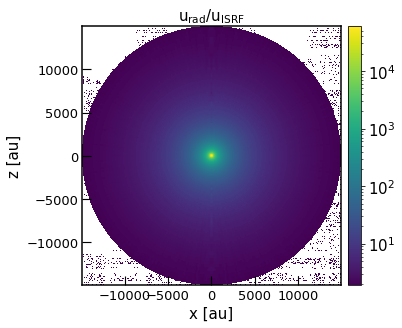

In [5]:
import matplotlib
# Plot radiation field strength
U = dictionary['data']['U']
fig, ax = plt.subplots(figsize = (5,5))
xmin = dictionary['boundary']['xmin']
xmax = dictionary['boundary']['xmax']
ymin = dictionary['boundary']['ymin']
ymax = dictionary['boundary']['ymax']
im = ax.imshow(U[1, :, :], norm = matplotlib.colors.LogNorm(), extent = [xmin, xmax, ymin, ymax])
ff.configure_colorbar(im, fig, ax)
ff.configure_figure(ax)
ax.set_xlabel('x [au]', fontsize = 15)
ax.set_ylabel('z [au]', fontsize = 15)
ax.set_title(r'$\sf{\rm u_{\rm rad}/u_{\rm ISRF}}$', fontsize = 15)

 

Text(0.5, 1.0, '$\\sf{\\rm a_{\\rm align}}$')

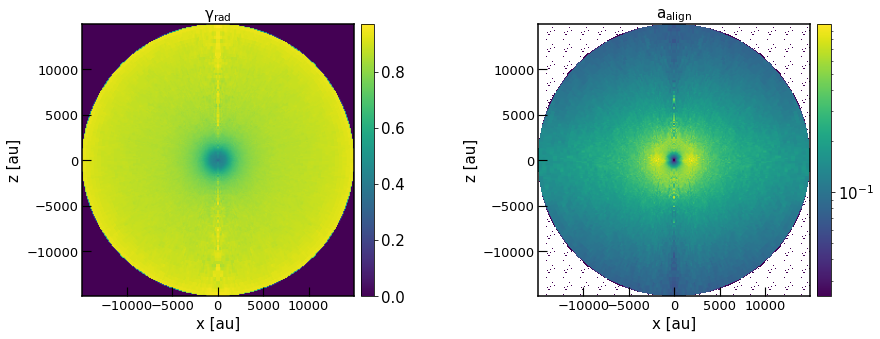

In [6]:
fname = os.path.join(directory, 'data/output_midplane.fits')
data = ff.plot_2d(fname)
dictionary = data.read_fits()
import matplotlib

# Plot anisotropic degree
gamma = dictionary['data']['gamma']
fig, ax = plt.subplots(1,2, figsize = (15,5))
im = ax[0].imshow(gamma[1, :, :], extent = [xmin, xmax, ymin, ymax])
ff.configure_colorbar(im, fig, ax[0])
ff.configure_figure(ax[0])
ax[0].set_xlabel('x [au]', fontsize = 15)
ax[0].set_ylabel('z [au]', fontsize = 15)
ax[0].set_title(r'$\sf{\rm \gamma_{\rm rad}}$', fontsize = 15)


align = dictionary['data']['align']
im = ax[1].imshow(align[1, :, :], norm = matplotlib.colors.LogNorm(), extent = [xmin, xmax, ymin, ymax])
ff.configure_colorbar(im, fig, ax[1])
ff.configure_figure(ax[1])
ax[1].set_xlabel('x [au]', fontsize = 15)
ax[1].set_ylabel('z [au]', fontsize = 15)
ax[1].set_title(r'$\sf{\rm a_{\rm align}}$', fontsize = 15)

 